# IMDM Sentiment Analysis

In [1]:
import os

imdb_dir = "C:/Users/16504/Desktop/NLP/0_Google_Drive/NLP/Data/aclImdb"

train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [2]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [3]:
labels[0]

0

In [4]:
import pandas as pd
import numpy as np

data = pd.DataFrame({'Texts': texts, 'Labels': labels})
data.head()

,Texts,Labels
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


In [5]:
# Shuffling DataFrame
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad 80s TV show got loose and trie...,0


In [6]:
# Removing html tags
from bs4 import BeautifulSoup
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    return text

data['Texts'] = data['Texts'].apply(remove_html)
data.head()

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad 80s TV show got loose and trie...,0


In [7]:
# Remove all URLs
def remove_urls(text):
    text = re.sub(r'https?:\/\/\S*| www\.\S*', '', text, flags=re.MULTILINE)
    return text

import re
data['Texts'] = data['Texts'].apply(remove_urls)
data.head()

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad 80s TV show got loose and trie...,0


In [8]:
# Remove all # and @ words
def remove_sym_words(text):
    text = re.sub(r'@\w*\S| #\w*\S', ' ', text)
    return text

data['Texts'] = data['Texts'].apply(remove_sym_words)
data.head()

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad 80s TV show got loose and trie...,0


In [9]:
# Remove Accented
import unicodedata

def remove_accented(text):
    text = unicodedata.normalize("NFKD", text ).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

data['Texts'] = data['Texts'].apply(remove_accented)
data.head()                

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad 80s TV show got loose and trie...,0


In [10]:
# Replacing Punctuation
data['Texts'] = data['Texts'].str.replace("`", "'")
data.head()                

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad 80s TV show got loose and trie...,0


In [11]:
# Removing Numbers
def remove_num(text):
    text = re.sub(r'\d*', '', text)
    return text                
                
data['Texts'] = data['Texts'].apply(remove_num)
data.head() 

,Texts,Labels
18857,"Right from the start you see that ""Anchors Awe...",1
17585,I love and admire the Farrelly brothers! How c...,1
13930,Considered by almost all the critics to be the...,1
16709,"For real film people, this film is a must, sin...",1
2919,It's like a bad s TV show got loose and tried ...,0


In [12]:
# Expanding contractions
slang = pd.read_csv('../Data/slang.csv', index_col = 'Unnamed: 0')
slang.head()

slang_columns = list(slang.columns)

def replace_slang(text):
    text = text.lower()
    mylis = text.split()
    new = []
    for i in mylis:
        if isinstance(i, str):
            if i in slang_columns:
                new.append(slang[i].loc[i[0]])
            else:
                new.append(i)
        else:
            continue
    text = ' '.join(new)
    return text

data['new_text'] = data['Texts'].apply(replace_slang)
data.head(15)

,Texts,Labels,new_text
18857,"Right from the start you see that ""Anchors Awe...",1,"right from the start you see that ""anchors awe..."
17585,I love and admire the Farrelly brothers! How c...,1,i love and admire the farrelly brothers! how c...
13930,Considered by almost all the critics to be the...,1,considered by almost all the critics to be the...
16709,"For real film people, this film is a must, sin...",1,"for real film people, this film is a must, sin..."
2919,It's like a bad s TV show got loose and tried ...,0,it is like a bad s television show got loose a...
21488,the fact that the movie is predictable is not ...,1,the fact that the movie is predictable is not ...
11303,It was a disappointment to see this DVD after ...,0,it was a disappointment to see this dvd after ...
22017,"This film is one of the best of all time, cert...",1,"this film is one of the best of all time, cert..."
17810,"I just saw ""Valentine"" and I have to say that ...",1,"i just saw ""valentine"" and i have to say that ..."
20744,I saw this film at the Taos Film Festival last...,1,i saw this film at the taos film festival last...


In [13]:
data['Texts'][2]

"This film lacked something I couldn't put my finger on at first: charisma on the part of the leading actress. This inevitably translated to lack of chemistry when she shared the screen with her leading man. Even the romantic scenes came across as being merely the actors at play. It could very well have been the director who miscalculated what he needed from the actors. I just don't know.But could it have been the screenplay? Just exactly who was the chef in love with? He seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful exploits, than of anybody or anything else. He never convinced me he was in love with the princess.I was disappointed in this movie. But, don't forget it was nominated for an Oscar, so judge for yourself."

In [14]:
data['new_text'][2]

'this film lacked something i could not put my finger on at first: charisma on the part of the leading actress. this inevitably translated to lack of chemistry when she shared the screen with her leading man. even the romantic scenes came across as being merely the actors at play. it could very well have been the director who miscalculated what he needed from the actors. i just do not know.but could it have been the screenplay? just exactly who was the chef in love with? he seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful exploits, than of anybody or anything else. he never convinced me he was in love with the princess.i was disappointed in this movie. but, do not forget it was nominated for an oscar, so judge for yourself.'

In [15]:
data.columns = data.columns.map({'Texts' : 'Texts',"Labels": "Labels", 'new_text': 'Text'})
data.head(3)

data.columns

Index(['Texts', 'Labels', 'Text'], dtype='object')

In [16]:
# Clean Text
import string

def clean(text):
    
    mylist = [' ' if alpha in list(string.punctuation) else alpha for alpha in text ]
    text = ''.join(mylist)
    text = text.replace('  ', ' ')
    text = text.replace('  ', ' ')
    text = text.lower().strip()
    return text

data['Texts'] = data['Texts'].apply(clean)
data.head() 

,Texts,Labels,Text
18857,right from the start you see that anchors awei...,1,"right from the start you see that ""anchors awe..."
17585,i love and admire the farrelly brothers how co...,1,i love and admire the farrelly brothers! how c...
13930,considered by almost all the critics to be the...,1,considered by almost all the critics to be the...
16709,for real film people this film is a must since...,1,"for real film people, this film is a must, sin..."
2919,it s like a bad s tv show got loose and tried ...,0,it is like a bad s television show got loose a...


In [18]:
data['Text'] = data['Text'].apply(clean)
data.head() 

,Texts,Labels,Text
18857,right from the start you see that anchors awei...,1,right from the start you see that anchors awei...
17585,i love and admire the farrelly brothers how co...,1,i love and admire the farrelly brothers how co...
13930,considered by almost all the critics to be the...,1,considered by almost all the critics to be the...
16709,for real film people this film is a must since...,1,for real film people this film is a must since...
2919,it s like a bad s tv show got loose and tried ...,0,it is like a bad s television show got loose a...


In [19]:
data['Texts'][0]

'story of a man who has unnatural feelings for a pig starts out with a opening scene that is a terrific example of absurd comedy a formal orchestra audience is turned into an insane violent mob by the crazy chantings of it s singers unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting even those from the era should be turned off the cryptic dialogue would make shakespeare seem easy to a third grader on a technical level it s better than you might think with some good cinematography by future great vilmos zsigmond future stars sally kirkland and frederic forrest can be seen briefly'

In [20]:
data['Text'][0]

'story of a man who has unnatural feelings for a pig starts out with a opening scene that is a terrific example of absurd comedy a formal orchestra audience is turned into an insane violent mob by the crazy chantings of it is singers unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting even those from the era should be turned off the cryptic dialogue would make shakespeare seem easy to a third grader on a technical level it is better than you might think with some good cinematography by future great vilmos zsigmond future stars sally kirkland and frederic forrest can be seen briefly'

In [21]:
# Remove Stopwords
from nltk.corpus import stopwords
mystop = stopwords.words('english')

def remove_stop_words(text):
    text = [word  for word in text.split() if word not in mystop]
    text = ' '.join(text)
    return text

data['Text'] = data['Text'].apply(remove_stop_words)
data.head() 

data['Text'][0]

'story man unnatural feelings pig starts opening scene terrific example absurd comedy formal orchestra audience turned insane violent mob crazy chantings singers unfortunately stays absurd whole time general narrative eventually making putting even era turned cryptic dialogue would make shakespeare seem easy third grader technical level better might think good cinematography future great vilmos zsigmond future stars sally kirkland frederic forrest seen briefly'

In [22]:
data.to_csv('Cleaned_IMDB.csv')

In [23]:
# Splitting the data
X = data['Text']
y = data['Labels']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8)
X_train.shape, X_test.shape

((20000,), (5000,))

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range = (1,2), max_features = 50000)
tfidf.fit(X_train)
X_train_1 = tfidf.transform(X_train)

In [26]:
X_train_1.shape

(20000, 50000)

In [27]:
X_test_1 = tfidf.transform(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model):
    
    # Classification Report
    y_pred = model.predict(X_test_1)
    print(classification_report(y_pred, y_test))
    print('*'*50)
    
    #Accuracy Score
    print("Accuracy Score :", accuracy_score(y_pred, y_test))
    print("*"*50)
    
    # Confusion Matrix Heatmap
    cnf_matrix = confusion_matrix(y_pred, y_test)
    labels = ['Negative', 'Positive']
    plt.figure(figsize = (8,8))
    sns.heatmap(cnf_matrix, 
              annot = True, 
              cmap = "Blues", 
              fmt = '',
              xticklabels = labels,
              yticklabels = labels)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

In [29]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2531
           1       0.87      0.88      0.88      2469

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

**************************************************
Accuracy Score : 0.8778
**************************************************


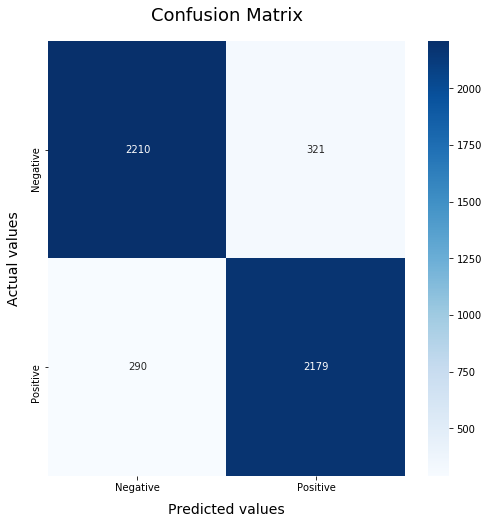

In [30]:
# BernoullNB
bnb_model = BernoulliNB(alpha = 2)
bnb_model.fit(X_train_1, y_train)

evaluate_model(bnb_model)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2506
           1       0.88      0.88      0.88      2494

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

**************************************************
Accuracy Score : 0.8792
**************************************************


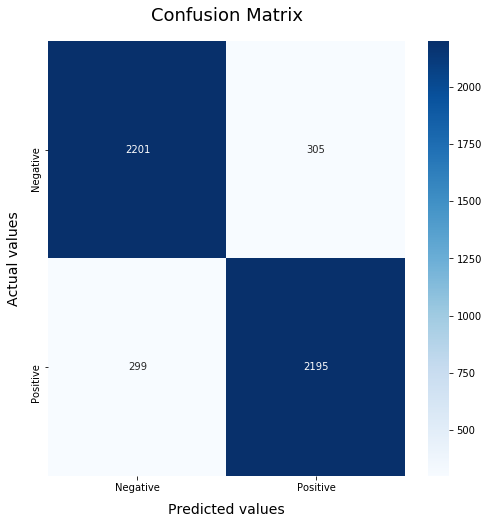

In [31]:
# Multinomial NB
mnb_model = MultinomialNB(alpha = 2, fit_prior = False)
mnb_model.fit(X_train_1, y_train)

evaluate_model(mnb_model)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2462
           1       0.91      0.89      0.90      2538

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

**************************************************
Accuracy Score : 0.8976
**************************************************


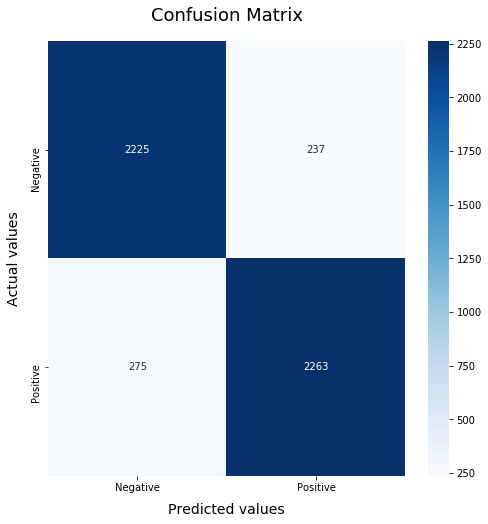

In [32]:
# Linear SVC
SVC_model = LinearSVC()
SVC_model.fit(X_train_1, y_train)

evaluate_model(SVC_model)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2429
           1       0.91      0.89      0.90      2571

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

**************************************************
Accuracy Score : 0.897
**************************************************


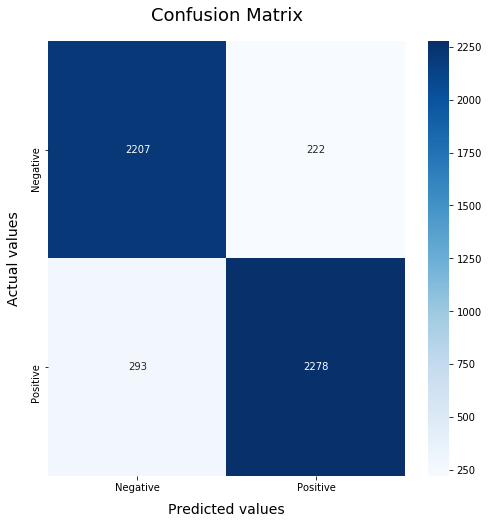

In [33]:
# Logistic Regression
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(X_train_1, y_train)

evaluate_model(LR_model)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2466
           1       0.88      0.87      0.88      2534

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

**************************************************
Accuracy Score : 0.876
**************************************************


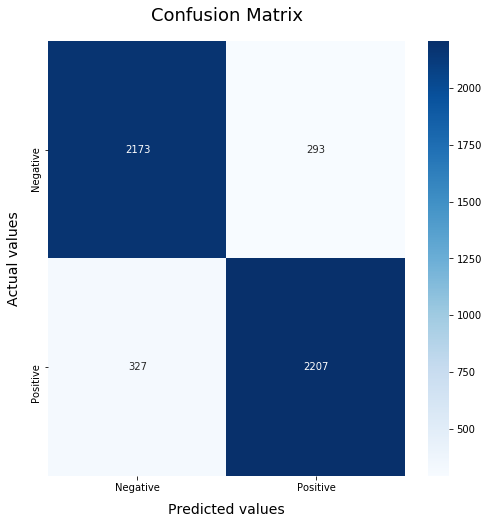

In [34]:
# XGBoost
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth = 6, n_estimators =1000, nthread = 3)
xgbc.fit(X_train_1, y_train)
evaluate_model(xgbc)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2336
           1       0.89      0.83      0.86      2664

    accuracy                           0.85      5000
   macro avg       0.85      0.86      0.85      5000
weighted avg       0.86      0.85      0.85      5000

**************************************************
Accuracy Score : 0.8536
**************************************************


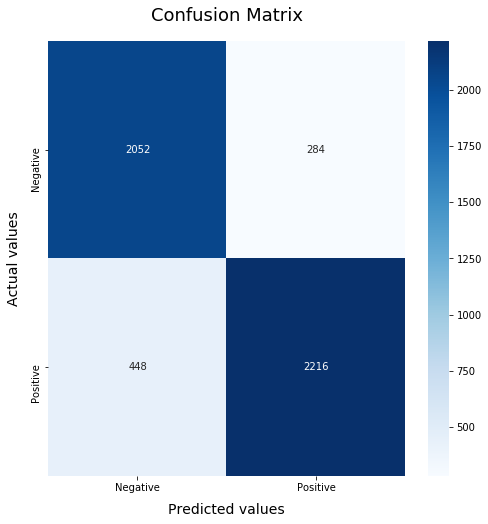

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(max_depth = 18, n_estimators=1000, random_state=42)
rf.fit(X_train_1,y_train)

evaluate_model(rf)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

for c in [0.01, 0.05,0.2, 0.25,0.3,  0.5, 2]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_cv, y_train)
    y_val = lr.predict(X_test_cv)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test_cv))))

In [ ]:
feature_to_coef = {
                    word: coef for word, coef in zip(
                        cv.get_feature_names(), LR_model.coef_[0]
                    )
                }

In [ ]:
for best_positive in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:5]:
    print (best_positive)    

In [ ]:
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:5]:
    print (best_negative)    

Thanks :-)